# Customer segmentation
_G.Tanzi (2023)_
____

This notebook aims at analyzing the content of a (fake) database that lists details of people working in a hospital.
The Aim is to Show how different clustering strategies can lead to different clusters.<br>

___

**1. Data Exploration**

   - 1.1 Exploring Datasets with Python
   - 1.2 Visualize Datasets


**2. Data Preparation**

   - 2.1 Data Cleaning
   - 2.2 Categorical Encoding
   - 2.3 Feature Engineering
   - 2.4 Feature Scaling
   - 2.5 Feature Selection

   
**3. Clustering**
   - 3.1 Comparison of Kmeans, DBSCAN and Gaussian Mixture




## **Python Basic operations**
Entering a command with SHIFT executes the line and prints the result:

In [1]:
4 + 4

8

In [2]:
4 * 8 

32

In [3]:
5/2

2.5

In [4]:
def sum(a, b):
    return a + b

sum(40, 2)

42

# 2 Data Exploration
## 2.1 Exploring Datasets with Python

To work with tabular files / dataset (like CSV), we will use [Pandas](http://pandas.pydata.org/). 
We will also use [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) for plotting 
Finally we will need some scientific libraries like [scikit-learn](https://scikit-learn.org/stable/) and [numpy](https://numpy.org/) for data manipulation, preprocessing and clustering.
All the above are open source libraries providing high-performance, easy-to-use data structures and data analysis tools for Python. 


Let's import it!


In [5]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np

### Import the dataset

Our dataset is given as a CSV file. Pandas provides an easy way to read our file with `read_csv`. The path of the file to read is relative to our notebook file.

In [6]:
data = pd.read_csv('hospital.csv')

### Exploring the dataset

The first thing we will check is the size of our dataset. We can use `info()` to get the number of entries of each column.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    283 non-null    int64  
 1   Gender                 283 non-null    object 
 2   Education              283 non-null    object 
 3   Role                   283 non-null    object 
 4   AvgVisitDuration       283 non-null    float64
 5   PrescriptionAttitude   283 non-null    object 
 6   PublicationsNumber     283 non-null    int64  
 7   CongressesAttended     283 non-null    int64  
 8   PartnershipsPhC        283 non-null    int64  
 9   CollabAttitudePhC      283 non-null    object 
 10  AvgOpenedEmail         283 non-null    float64
 11  VisitsLandingPageLY    283 non-null    int64  
 12  AccessOnlineServiceLY  283 non-null    int64  
 13  AttendedEventsLY       283 non-null    int64  
 14  ClickthroughRate       283 non-null    float64
 15  OpenRa

### See the first 5 entries

Now we know how many data is inside our file. Pandas is smart enough to parse the column titles by itself and estimate the data types of each column.

You may be curious how the data looks like. Let's see by using `head()`, which will print the first 5 rows.

In [8]:
data.head()

,Age,Gender,Education,Role,AvgVisitDuration,PrescriptionAttitude,PublicationsNumber,CongressesAttended,PartnershipsPhC,CollabAttitudePhC,AvgOpenedEmail,VisitsLandingPageLY,AccessOnlineServiceLY,AttendedEventsLY,ClickthroughRate,OpenRate,EngagementDriver
0,32,F,Master'sdegree,Surgeon,30.0,Neutral,10,5,3,Positive,5.0,100,100,5,0.124917,0.292641,EasyNavigation
1,46,M,Bachelor'sdegree,NursePractitioner,20.0,Positive,5,2,1,Neutral,7.0,100,75,3,0.126462,0.390572,RelevantContent
2,55,F,Doctorate,MedicalDirector,30.0,Negative,20,10,5,Negative,3.0,100,100,7,0.037196,0.188256,Personalization
3,28,M,Bachelor'sdegree,Intern,10.0,Neutral,2,0,0,Neutral,6.0,50,25,1,0.086292,0.238857,FastLoading
4,62,F,Doctorate,ChiefofMedicine,60.0,Positive,30,15,10,Positive,2.0,100,100,10,0.089610,0.368277,InteractiveDesign


### Number of observations in the dataset

In [9]:
("The number of observation are ",data.shape[0])

('The number of observation are ', 283)

### Number of columns in the dataset

In [10]:
("The number of Columns are ",data.shape[1])

('The number of Columns are ', 17)

### Name of all the columns (Features)

In [11]:
data.columns

Index(['Age', 'Gender', 'Education', 'Role', 'AvgVisitDuration',
       'PrescriptionAttitude', 'PublicationsNumber', 'CongressesAttended',
       'PartnershipsPhC', 'CollabAttitudePhC', 'AvgOpenedEmail',
       'VisitsLandingPageLY', 'AccessOnlineServiceLY', 'AttendedEventsLY',
       'ClickthroughRate', 'OpenRate', 'EngagementDriver'],
      dtype='object')

### Summarize the dataframes

In [12]:
data.describe()

,Age,AvgVisitDuration,PublicationsNumber,CongressesAttended,PartnershipsPhC,AvgOpenedEmail,VisitsLandingPageLY,AccessOnlineServiceLY,AttendedEventsLY,ClickthroughRate,OpenRate
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,33.809187,28.900353,7.893993,3.088339,1.236749,3.069611,13.371025,22.551237,4.441696,0.163015,0.333056
std,6.325031,8.247065,4.481174,2.131153,1.219141,1.823428,15.909768,15.806454,2.223176,0.106607,0.203321
min,22.000000,10.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000,1.000000,0.005026,0.035313
25%,29.000000,25.000000,5.000000,2.000000,1.000000,2.000000,7.000000,15.000000,3.000000,0.055798,0.112390
50%,33.000000,30.000000,7.000000,3.000000,1.000000,3.000000,11.000000,19.000000,4.000000,0.179561,0.380516
75%,37.000000,35.000000,10.000000,4.000000,1.000000,4.000000,14.000000,27.000000,6.000000,0.254822,0.550209
max,68.000000,60.000000,30.000000,15.000000,10.000000,10.000000,100.000000,100.000000,10.000000,0.482138,0.780867


### Value Counts

For categorical features like `Role`, you can also get the distributions of each value by using `value_counts()`.
Or we can simply list out the unique values in a column by using `unique()`

In [13]:
data['Role'].value_counts()

Physician              102
Dentist                 85
Surgeon                 50
Registered Nurse        20
Physician Assistant      7
Pharmacist               5
Nurse                    3
NursePractitioner        2
MedicalDirector          2
Intern                   2
ChiefofMedicine          1
Resident                 1
ChiefofSurgery           1
Nurse Practitioner       1
Medical Assistant        1
Name: Role, dtype: int64

In [14]:
data['Education'].unique()

array(["Master'sdegree", "Bachelor'sdegree", 'Doctorate', 'Bachelor',
       'Master', 'PhD', "Bachelor's", "Master's", 'Bachelor of Science',
       'Doctor of Medicine', 'Doctor of Dental Medicine',
       'Doctor of Osteopathic Medicine', 'Master of Science'],
      dtype=object)

### Data Filtering

There is also an easy way to filter your dataset. Let's say we want to have a subset of our data containing only woman. This is also possible with the bracket notation!

In [15]:
women_data = data[data['Gender'] == 'F']
women_data.head()

,Age,Gender,Education,Role,AvgVisitDuration,PrescriptionAttitude,PublicationsNumber,CongressesAttended,PartnershipsPhC,CollabAttitudePhC,AvgOpenedEmail,VisitsLandingPageLY,AccessOnlineServiceLY,AttendedEventsLY,ClickthroughRate,OpenRate,EngagementDriver
0,32,F,Master'sdegree,Surgeon,30.0,Neutral,10,5,3,Positive,5.0,100,100,5,0.124917,0.292641,EasyNavigation
2,55,F,Doctorate,MedicalDirector,30.0,Negative,20,10,5,Negative,3.0,100,100,7,0.037196,0.188256,Personalization
4,62,F,Doctorate,ChiefofMedicine,60.0,Positive,30,15,10,Positive,2.0,100,100,10,0.089610,0.368277,InteractiveDesign
5,36,F,Doctorate,MedicalDirector,25.0,Positive,15,8,2,Positive,4.0,100,100,6,0.168397,0.314688,User-FriendlyInterface
7,29,F,Bachelor'sdegree,Intern,10.0,Negative,1,0,0,Negative,2.0,25,10,1,0.060293,0.183482,PersonalizedExperience


## 2.2 Visualize Data

To visualize our data, we will use [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org), that are thw two most famous Python visualization library. In particular, Seaborn provides a high-level interface for drawing attractive statistical graphics. Let's import it.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

To see our charts directly in our notebook, we have to execute the following:

In [17]:
sns.set_context('talk') # any of paper, notebook, talk, poster
sns.set(rc={'figure.figsize':(10,10)})


Seaborn together with Pandas makes it pretty easy to create charts to analyze our data. We can pass our Dataframes and Series directly into Seaborn methods. We will see how in the following sections.

### Univariate Plotting

Let's start by visualizing the distribution of the age our our people. We can achieve this with a simple method called `displot` by passing our series of ages as argument.

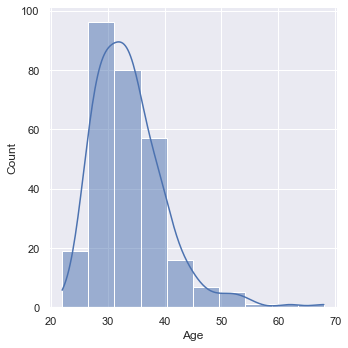

In [18]:
sns.displot(data['Age'], bins=10, kde=True);

The chart above calculates a kernel density as well. To get a real histogram, we have to disable the `kde` feature. We can also increase or decrease the number of buckets for our histogram by setting `bins` to a higher/lower number.

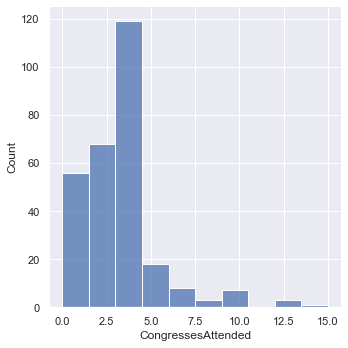

In [19]:
sns.displot(data['CongressesAttended'], bins=10, kde=False);

### Bivariate Plotting

Numbers get even more interesting when we can compare them to other numbers! Lets start comparing Age vs other features. Seaborn provides us with a method called `jointplot` for this use case.

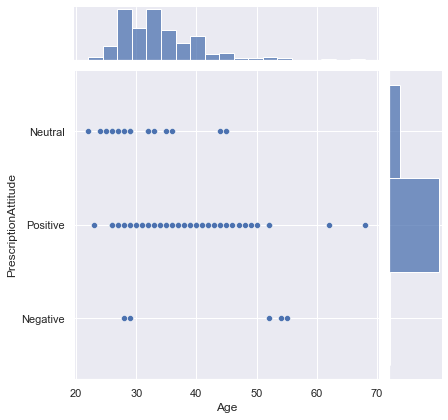

In [20]:
sns.jointplot(x=data['Age'],y=data['PrescriptionAttitude']);

If both features are numeric, we can get a better feeling of how they are related using a simple linear regression model by specifying `kind` as `reg`.

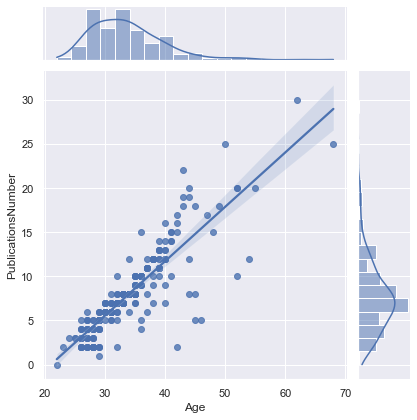

In [21]:
sns.jointplot(x=data['Age'], y=data['PublicationsNumber'], kind='reg')

We can also use a kernel to kompare the density of two columns against each other

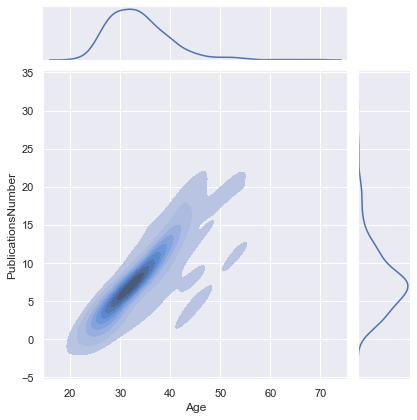

In [22]:
sns.jointplot(x=data['Age'], y=data['PublicationsNumber'], kind='kde', shade=True)

We can get an even better comparison by plotting everything vs everything! Seaborn provides this with the `pairplot` method.

In [23]:
numeric_features = ['Age', 
'AvgVisitDuration',
'PublicationsNumber',
'CongressesAttended',
'ClickthroughRate'
]

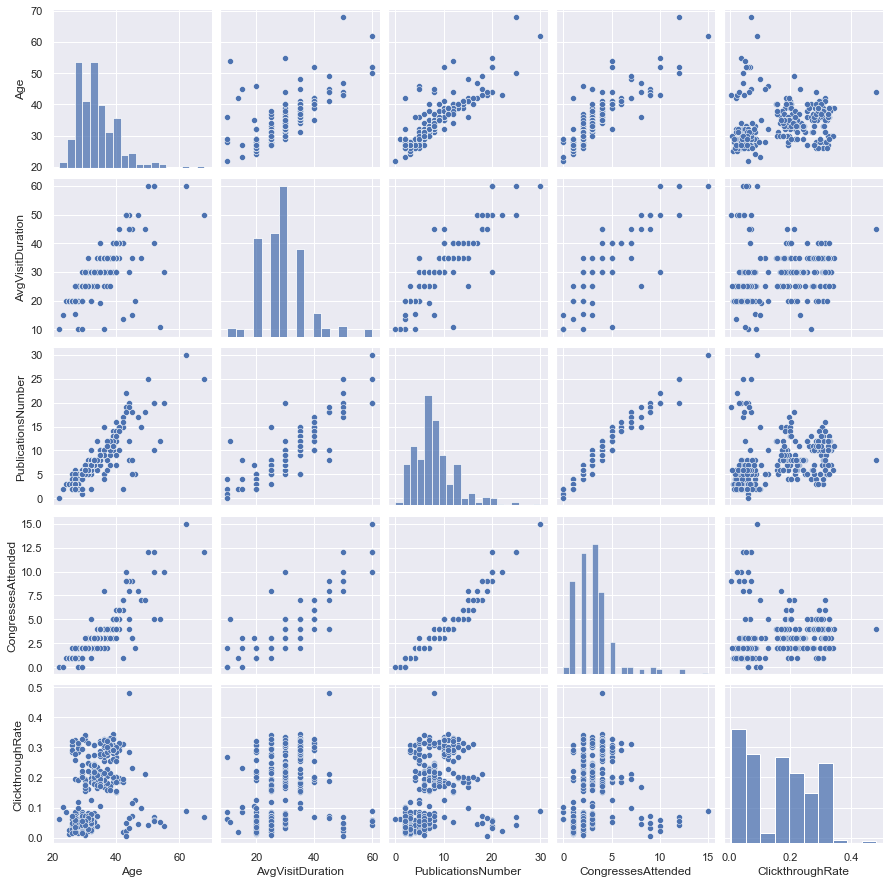

In [24]:
sns.pairplot(data[numeric_features]);

You won't see any special in this data. We need to separate them by some kind of criteria. We can use our categorical values to do this! Seaborn uses a parameter called `hue` to do this. Let's separate our data by `Gender` first. To make things even more interesting, let's create a regression for every plot, too!

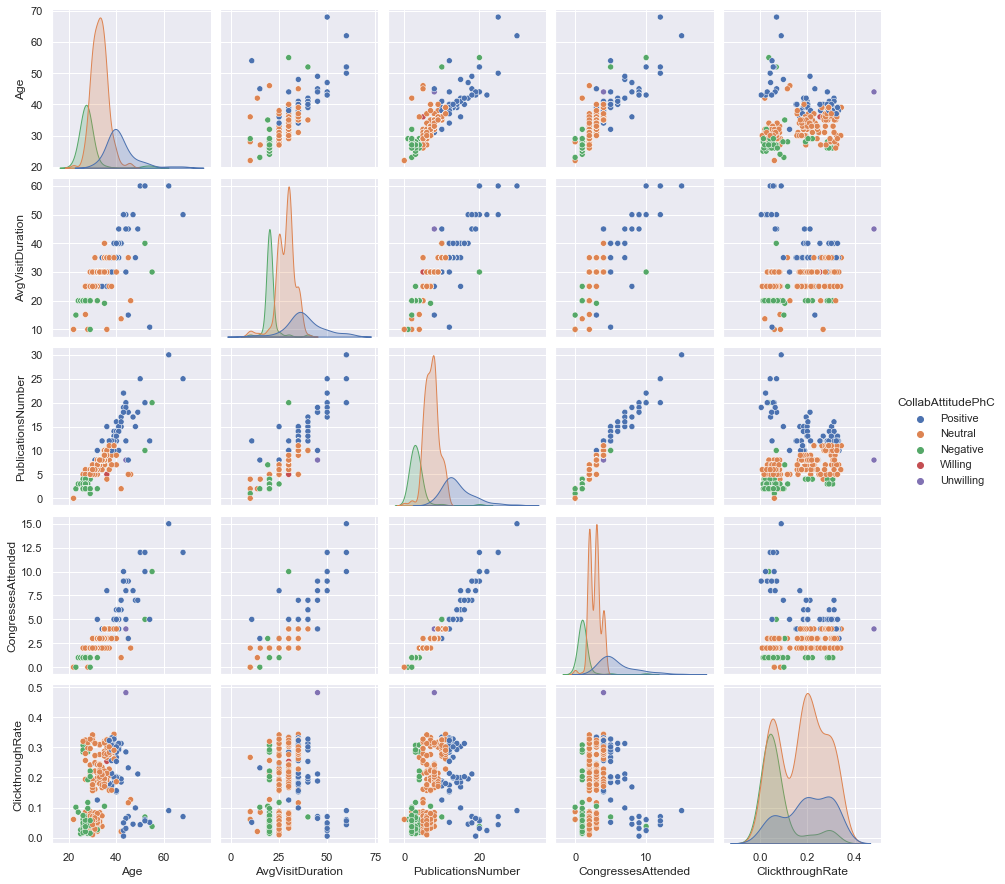

In [25]:
hue = 'CollabAttitudePhC'

sns.pairplot(data[numeric_features+[hue]], hue=hue);

Here are some categorical plots to explore the dataset even further.

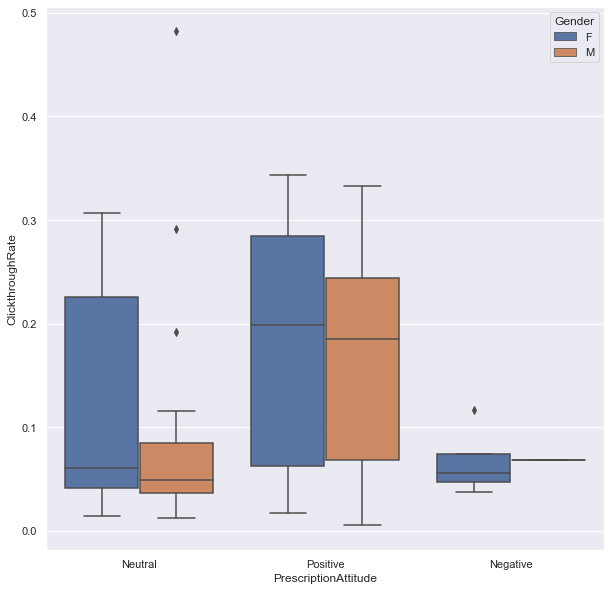

In [123]:
sns.boxplot(x="PrescriptionAttitude", y="ClickthroughRate", hue="Gender", data=data);

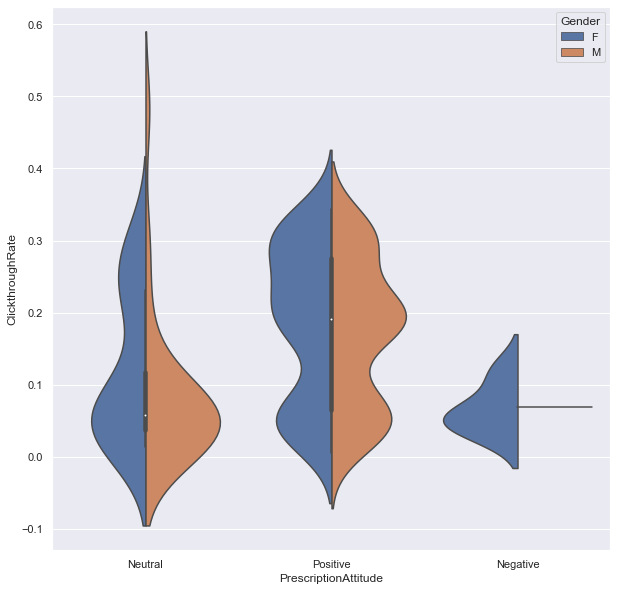

In [124]:
sns.violinplot(x="PrescriptionAttitude", y="ClickthroughRate", hue="Gender", data=data, split=True);

In [125]:
data.query('Gender=="M" and PrescriptionAttitude=="Negative"')

,Age,Gender,Education,Role,AvgVisitDuration,PrescriptionAttitude,PublicationsNumber,CongressesAttended,PartnershipsPhC,CollabAttitudePhC,AvgOpenedEmail,VisitsLandingPageLY,AccessOnlineServiceLY,AttendedEventsLY,ClickthroughRate,OpenRate,EngagementDriver
10,52,M,Doctorate,ChiefofSurgery,40.0,Negative,10,5,1,Negative,1.0,100,100,7,0.068649,0.180003,Interactive


We can also get the correlations between the values by using Pandas builtin method `corr()`.

In [29]:
data.corr()

,Age,AvgVisitDuration,PublicationsNumber,CongressesAttended,PartnershipsPhC,AvgOpenedEmail,VisitsLandingPageLY,AccessOnlineServiceLY,AttendedEventsLY,ClickthroughRate,OpenRate
Age,1.000000,0.758597,0.869808,0.872021,0.817089,0.698831,0.616967,0.805679,0.823842,0.211635,0.255983
AvgVisitDuration,0.758597,1.000000,0.887386,0.872916,0.781702,0.666342,0.307805,0.590549,0.854900,0.282773,0.264011
PublicationsNumber,0.869808,0.887386,1.000000,0.969007,0.913337,0.755512,0.467700,0.758795,0.935518,0.248299,0.270236
CongressesAttended,0.872021,0.872916,0.969007,1.000000,0.920014,0.750246,0.532312,0.787437,0.891371,0.142583,0.166227
PartnershipsPhC,0.817089,0.781702,0.913337,0.920014,1.000000,0.678486,0.478293,0.713638,0.820866,0.132258,0.154871
AvgOpenedEmail,0.698831,0.666342,0.755512,0.750246,0.678486,1.000000,0.366474,0.602494,0.809151,0.171824,0.206164
VisitsLandingPageLY,0.616967,0.307805,0.467700,0.532312,0.478293,0.366474,1.000000,0.902203,0.363092,-0.018084,0.050105
AccessOnlineServiceLY,0.805679,0.590549,0.758795,0.787437,0.713638,0.602494,0.902203,1.000000,0.698522,0.107553,0.169854
AttendedEventsLY,0.823842,0.854900,0.935518,0.891371,0.820866,0.809151,0.363092,0.698522,1.000000,0.327182,0.350368
ClickthroughRate,0.211635,0.282773,0.248299,0.142583,0.132258,0.171824,-0.018084,0.107553,0.327182,1.000000,0.972690


Feed these stats into Seaborns `heatmap` method will provide us with the visual representation.

<AxesSubplot:>

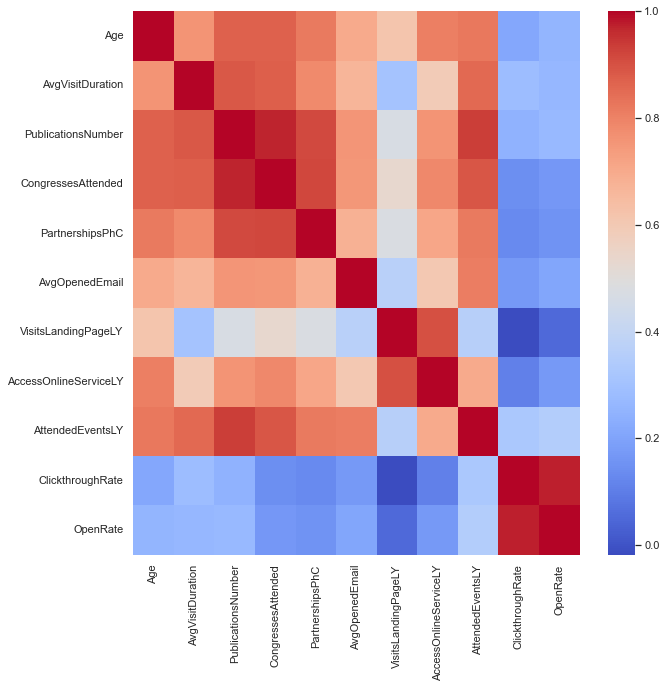

In [30]:
sns.heatmap(data.corr(), cmap='coolwarm')

In [31]:
data.columns

Index(['Age', 'Gender', 'Education', 'Role', 'AvgVisitDuration',
       'PrescriptionAttitude', 'PublicationsNumber', 'CongressesAttended',
       'PartnershipsPhC', 'CollabAttitudePhC', 'AvgOpenedEmail',
       'VisitsLandingPageLY', 'AccessOnlineServiceLY', 'AttendedEventsLY',
       'ClickthroughRate', 'OpenRate', 'EngagementDriver'],
      dtype='object')

In [32]:
data.describe()

,Age,AvgVisitDuration,PublicationsNumber,CongressesAttended,PartnershipsPhC,AvgOpenedEmail,VisitsLandingPageLY,AccessOnlineServiceLY,AttendedEventsLY,ClickthroughRate,OpenRate
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,33.809187,28.900353,7.893993,3.088339,1.236749,3.069611,13.371025,22.551237,4.441696,0.163015,0.333056
std,6.325031,8.247065,4.481174,2.131153,1.219141,1.823428,15.909768,15.806454,2.223176,0.106607,0.203321
min,22.000000,10.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000,1.000000,0.005026,0.035313
25%,29.000000,25.000000,5.000000,2.000000,1.000000,2.000000,7.000000,15.000000,3.000000,0.055798,0.112390
50%,33.000000,30.000000,7.000000,3.000000,1.000000,3.000000,11.000000,19.000000,4.000000,0.179561,0.380516
75%,37.000000,35.000000,10.000000,4.000000,1.000000,4.000000,14.000000,27.000000,6.000000,0.254822,0.550209
max,68.000000,60.000000,30.000000,15.000000,10.000000,10.000000,100.000000,100.000000,10.000000,0.482138,0.780867


In [33]:
data['ClickthroughRate'].value_counts()

0.124917    1
0.070570    1
0.327760    1
0.325334    1
0.046722    1
           ..
0.271060    1
0.152124    1
0.017374    1
0.182141    1
0.170512    1
Name: ClickthroughRate, Length: 283, dtype: int64

# 3 Data Preparation


In [34]:
data2 = data.copy()

## 3.2 Categorical Encoding
Let's find out how many unique values (categories) are present for each literal feature

In [35]:
categorical_features = ['Gender',
                        'Education',
                        'Role',
                        'PrescriptionAttitude', 
                        'CollabAttitudePhC',
                        'EngagementDriver']

for feature in categorical_features:
    print(data2[feature].value_counts())
    print('\n##############################')

F    142
M    141
Name: Gender, dtype: int64

##############################
Doctor of Medicine                101
Doctor of Dental Medicine          85
Doctor of Osteopathic Medicine     46
Bachelor of Science                22
Master of Science                  12
Bachelor'sdegree                    4
Doctorate                           4
Master'sdegree                      3
Bachelor                            2
Master                              1
PhD                                 1
Bachelor's                          1
Master's                            1
Name: Education, dtype: int64

##############################
Physician              102
Dentist                 85
Surgeon                 50
Registered Nurse        20
Physician Assistant      7
Pharmacist               5
Nurse                    3
NursePractitioner        2
MedicalDirector          2
Intern                   2
ChiefofMedicine          1
Resident                 1
ChiefofSurgery           1
Nurse Practition

### Ordinal Encoding
For some features like Education, PrescriptionAttitude, CollabAttitudePhC, we can assign a numerical value to each category based on their rank or order, following a
natural hierarchy or scale in data

In [36]:
Education_2_rank = {
    "Bachelor'sdegree":1,
    'Bachelor':1,
    "Bachelor's":1,
    'Bachelor of Science':1,
    'Master':2, 
    "Master'sdegree":2,  
    "Master's":2, 
    'Master of Science':2, 
    'Doctorate':3, 
    'PhD':3, 
    'Doctor of Medicine':3,  
    'Doctor of Dental Medicine':3, 
    'Doctor of Osteopathic Medicine':3
}
data2['Education'] = data['Education'].map(Education_2_rank)
data2['Education'].head()

0    2
1    1
2    3
3    1
4    3
Name: Education, dtype: int64

In [37]:
PrescriptionAttitude_2_rank = {
    "Negative":-1,
    'Neutral':0,
    "Positive":1,
}
data2['PrescriptionAttitude'] = data['PrescriptionAttitude'].map(PrescriptionAttitude_2_rank)
data2['PrescriptionAttitude'].head()

0    0
1    1
2   -1
3    0
4    1
Name: PrescriptionAttitude, dtype: int64

In [38]:
CollabAttitudePhC_2_rank = {
    "Negative":-1,
    'Neutral':0,
    "Positive":1,
    "Willing":0.5,
    "Unwilling":-0.5,
}
data2['CollabAttitudePhC'] = data['CollabAttitudePhC'].map(CollabAttitudePhC_2_rank)
data2['CollabAttitudePhC'].head()

0    1.0
1    0.0
2   -1.0
3    0.0
4    1.0
Name: CollabAttitudePhC, dtype: float64

### One Hot Encoding
One Hot Encoding is recommended for features having a limited number of independent categories. In our example it is perfect for the Gender feature which only has 2 categories.

In [39]:
gender_1hot_encoded = pd.get_dummies(data.Gender, prefix='Gender')
gender_1hot_encoded.head()

,Gender_F,Gender_M
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [40]:
# add 1hot encoded gender to data2 and remove original Gender columns
data2[['Gender_F','Gender_M']] = gender_1hot_encoded[['Gender_F','Gender_M']]
#data2.drop(columns=['Gender'],inplace=True)
data2[['Gender','Gender_F','Gender_M']].head()

,Gender,Gender_F,Gender_M
0,F,1,0
1,M,0,1
2,F,1,0
3,M,0,1
4,F,1,0


What about the Role feature?

In [41]:
data2.Role.unique()

array(['Surgeon', 'NursePractitioner', 'MedicalDirector', 'Intern',
       'ChiefofMedicine', 'Resident', 'ChiefofSurgery', 'Nurse',
       'Physician', 'Nurse Practitioner', 'Dentist', 'Pharmacist',
       'Physician Assistant', 'Registered Nurse', 'Medical Assistant'],
      dtype=object)

### 2D Encoding 

The Role feature has many possible categories (15). In this case, the best approach is to encode values in a lower dimensional space (2) to reduce dimensionality. 

This is usually performed by special Neural Network, but for this simple case we can use the following 2-dimensional embedding for these job categories:

- Dimension 1: Clinical vs. Non-Clinical

- Dimension 2: Level of Responsibility

Using this embedding, we can categorize the jobs as follows:

Nurse 0.1 0.5
Medical Assistant 0.1 0.1
Nurse Practitioner 0 0
Physician Assistant 0.1 0.9
Registered Nurse 0.1 1
Pharmacist 0.2 1.1
Intern 0.9 0.3
Dentist 0.95 0.4
Resident 1 0.5
Chief of Surgery 1 1.1
Physician 0.9 0.8
Chief of Medicine 1 1.2
Surgeon 0.9 0.7
Medical Director 1 1.5


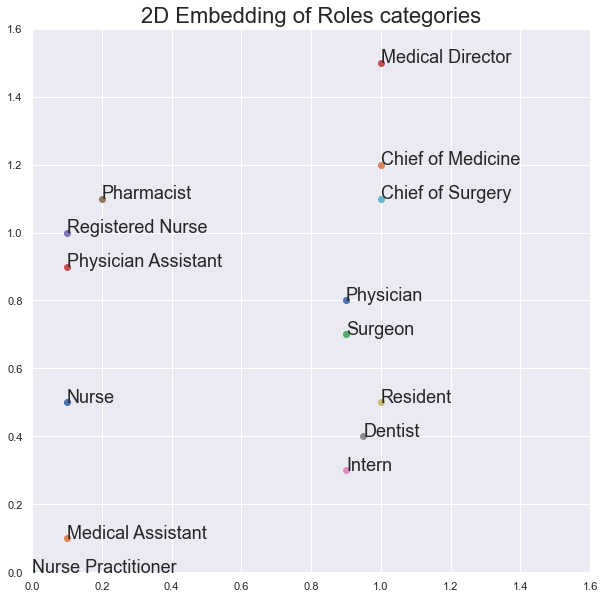

In [42]:
Role_2_rank = {
    "Nurse":(0.1,0.5),
    "Medical Assistant":(0.1,0.1),
    "Nurse Practitioner":(0,0),    
    "Physician Assistant":(0.1,0.9),   
    "Registered Nurse":(0.1,1),
    "Pharmacist":(0.2,1.1),
    'Intern':(0.9,0.3),
    'Dentist':(0.95,0.4),
    "Resident":(1,0.5),
    "Chief of Surgery":(1,1.1),
    "Physician":(0.9,0.8),
    "Chief of Medicine":(1,1.2),
    "Surgeon":(0.9,0.7),
    "Medical Director":(1,1.5),
}




for k,v in Role_2_rank.items():
    plt.scatter(v[0],v[1])
    plt.text(v[0],v[1],k,fontsize=18)
    print(k,v[0],v[1])
    
plt.ylim((0,1.6))
plt.xlim((0,1.6))
plt.title('2D Embedding of Roles categories',fontsize=22);

In [43]:
data2[['RoleClinical','RoleResponsability']] = pd.DataFrame(data['Role'].map(Role_2_rank).tolist(), index=data.index)
data2[['Role','RoleClinical','RoleResponsability']].head()



,Role,RoleClinical,RoleResponsability
0,Surgeon,0.9,0.7
1,NursePractitioner,NaN,NaN
2,MedicalDirector,NaN,NaN
3,Intern,0.9,0.3
4,ChiefofMedicine,NaN,NaN


In [44]:
data2.head()

,Age,Gender,Education,Role,AvgVisitDuration,PrescriptionAttitude,PublicationsNumber,CongressesAttended,PartnershipsPhC,CollabAttitudePhC,AvgOpenedEmail,VisitsLandingPageLY,AccessOnlineServiceLY,AttendedEventsLY,ClickthroughRate,OpenRate,EngagementDriver,Gender_F,Gender_M,RoleClinical,RoleResponsability
0,32,F,2,Surgeon,30.0,0,10,5,3,1.0,5.0,100,100,5,0.124917,0.292641,EasyNavigation,1,0,0.9,0.7
1,46,M,1,NursePractitioner,20.0,1,5,2,1,0.0,7.0,100,75,3,0.126462,0.390572,RelevantContent,0,1,NaN,NaN
2,55,F,3,MedicalDirector,30.0,-1,20,10,5,-1.0,3.0,100,100,7,0.037196,0.188256,Personalization,1,0,NaN,NaN
3,28,M,1,Intern,10.0,0,2,0,0,0.0,6.0,50,25,1,0.086292,0.238857,FastLoading,0,1,0.9,0.3
4,62,F,3,ChiefofMedicine,60.0,1,30,15,10,1.0,2.0,100,100,10,0.089610,0.368277,InteractiveDesign,1,0,NaN,NaN


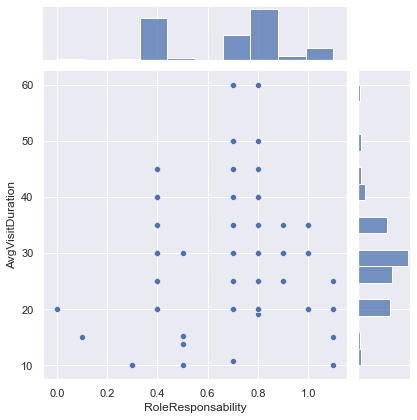

In [45]:
sns.jointplot(x=data2['RoleResponsability'], y=data['AvgVisitDuration'])

## 3.3 Feature Scaling
We will use a Standard scaler to Scale all the features in the dataset.


In [46]:
from sklearn.preprocessing import StandardScaler

In [55]:
data2.describe()

,Age,Education,AvgVisitDuration,PrescriptionAttitude,PublicationsNumber,CongressesAttended,PartnershipsPhC,CollabAttitudePhC,AvgOpenedEmail,VisitsLandingPageLY,AccessOnlineServiceLY,AttendedEventsLY,ClickthroughRate,OpenRate,Gender_F,Gender_M,RoleClinical,RoleResponsability
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,277.000000,277.000000
mean,33.809187,2.734982,28.900353,0.795053,7.893993,3.088339,1.236749,0.003534,3.069611,13.371025,22.551237,4.441696,0.163015,0.333056,0.501767,0.498233,0.810289,0.668231
std,6.325031,0.633362,8.247065,0.446075,4.481174,2.131153,1.219141,0.639970,1.823428,15.909768,15.806454,2.223176,0.106607,0.203321,0.500883,0.500883,0.276450,0.213667
min,22.000000,1.000000,10.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,3.000000,5.000000,1.000000,0.005026,0.035313,0.000000,0.000000,0.000000,0.000000
25%,29.000000,3.000000,25.000000,1.000000,5.000000,2.000000,1.000000,0.000000,2.000000,7.000000,15.000000,3.000000,0.055798,0.112390,0.000000,0.000000,0.900000,0.400000
50%,33.000000,3.000000,30.000000,1.000000,7.000000,3.000000,1.000000,0.000000,3.000000,11.000000,19.000000,4.000000,0.179561,0.380516,1.000000,0.000000,0.900000,0.700000
75%,37.000000,3.000000,35.000000,1.000000,10.000000,4.000000,1.000000,0.000000,4.000000,14.000000,27.000000,6.000000,0.254822,0.550209,1.000000,1.000000,0.950000,0.800000
max,68.000000,3.000000,60.000000,1.000000,30.000000,15.000000,10.000000,1.000000,10.000000,100.000000,100.000000,10.000000,0.482138,0.780867,1.000000,1.000000,1.000000,1.100000


We can see that the Age and the VisitsLandingPageLY features span a wide range of values before the scaling

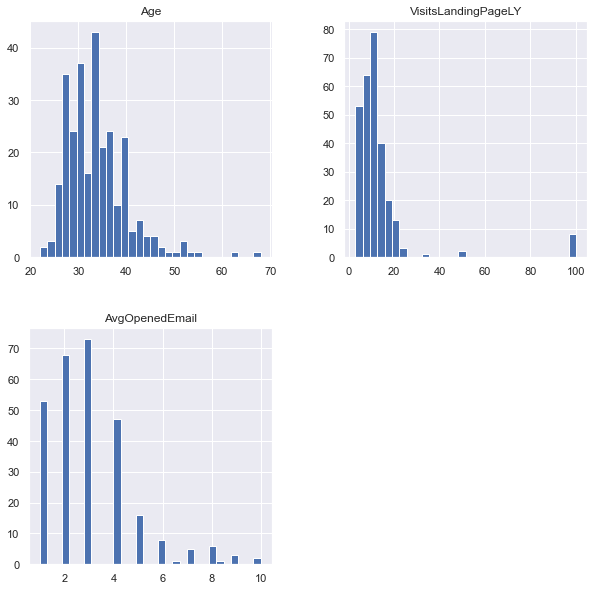

In [58]:
plt.figure(figsize=(10,10))
data2[['Age','VisitsLandingPageLY','AvgOpenedEmail']].hist(bins=30,ax=plt.gca());

In [59]:
final_features = ['Age', 'Education', 'AvgVisitDuration',
       'PrescriptionAttitude', 'PublicationsNumber', 'CongressesAttended',
       'PartnershipsPhC', 'CollabAttitudePhC', 'AvgOpenedEmail',
       'VisitsLandingPageLY', 'AccessOnlineServiceLY', 'AttendedEventsLY',
       'ClickthroughRate', 'OpenRate', 'Gender_F','Gender_M', 'RoleClinical', 'RoleResponsability']
data_scaled = data2.copy()
data_scaled[final_features] = StandardScaler().fit_transform(data2[final_features])
data_scaled = data_scaled.fillna(0)

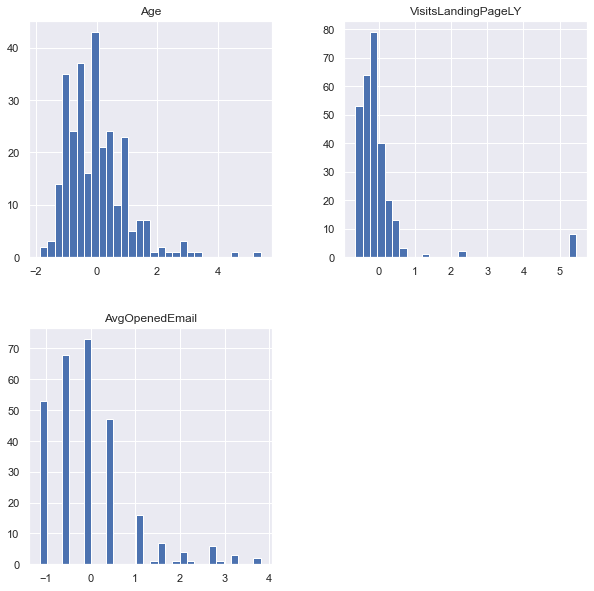

In [60]:
plt.figure(figsize=(10,10))
data_scaled[['Age','VisitsLandingPageLY','AvgOpenedEmail']].hist(bins=30,ax=plt.gca());

# 4 Clustering






In [118]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.mixture import GaussianMixture

Let's begin by testing the clustering algorithm on only two features
We want to understand the effect of the Scaling preprocessing to the shape of cluster detected in the dataset

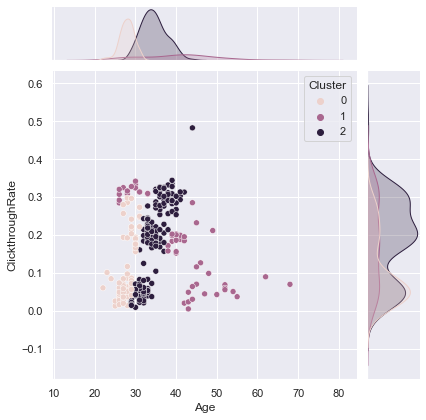

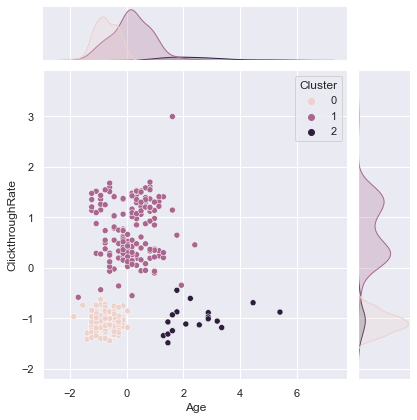

In [148]:
N_cluster = 2
selected_features = ['Age','ClickthroughRate']
model = KMeans(n_clusters = N_cluster)
#model = DBSCAN(eps=0.7)
model = GaussianMixture(n_components=3, random_state=0)



X =  data2[selected_features]
result = X.copy()

result['Cluster'] = model.fit_predict(X)
sns.jointplot(x=selected_features[0], y=selected_features[1],data=result, hue='Cluster', );


X =  data_scaled[selected_features]
result = X.copy()

result['Cluster'] = model.fit_predict(X)
sns.jointplot(x=selected_features[0], y=selected_features[1],data=result, hue='Cluster', );

How to find the optimal number of clusters?
We can use the silhouette score to find out!

In [134]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [136]:
model

KMeans(n_clusters=2)

In [139]:
import matplotlib.cm as cm



def find_best_kMeans(X,range_n_clusters):
    silhouette_scores = []
    for n_clusters in range_n_clusters:
        model = KMeans(n_clusters=n_clusters)
        cluster_labels = model.fit_predict(X)
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score is :",silhouette_avg)
        silhouette_scores.append(silhouette_avg)

    plt.plot(range_n_clusters,silhouette_scores)
    
def find_best_GMM(X,range_n_clusters):
    silhouette_scores = []
    for n_clusters in range_n_clusters:
        model = GaussianMixture(n_components=n_clusters)
        cluster_labels = model.fit_predict(X)
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score is :",silhouette_avg)
        silhouette_scores.append(silhouette_avg)

    plt.plot(range_n_clusters,silhouette_scores)

For n_clusters = 2 The average silhouette_score is : 0.5931729630197089
For n_clusters = 3 The average silhouette_score is : 0.5662755821380602
For n_clusters = 4 The average silhouette_score is : 0.5752231440928771
For n_clusters = 5 The average silhouette_score is : 0.5696518030633676


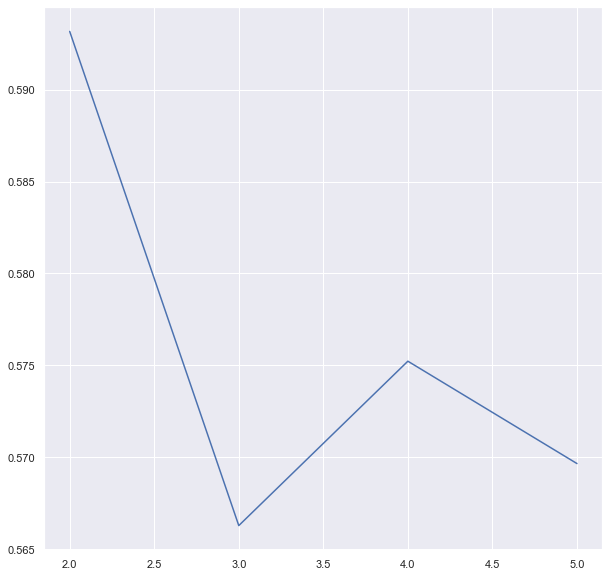

In [146]:
range_n_clusters = [2, 3, 4, 5, ]
X =  data2[selected_features].values

find_best_kMeans(X,range_n_clusters)

For n_clusters = 2 The average silhouette_score is : 0.35273544508290555
For n_clusters = 3 The average silhouette_score is : 0.5215612584542306
For n_clusters = 4 The average silhouette_score is : 0.18707045857514829
For n_clusters = 5 The average silhouette_score is : 0.10152250011843586


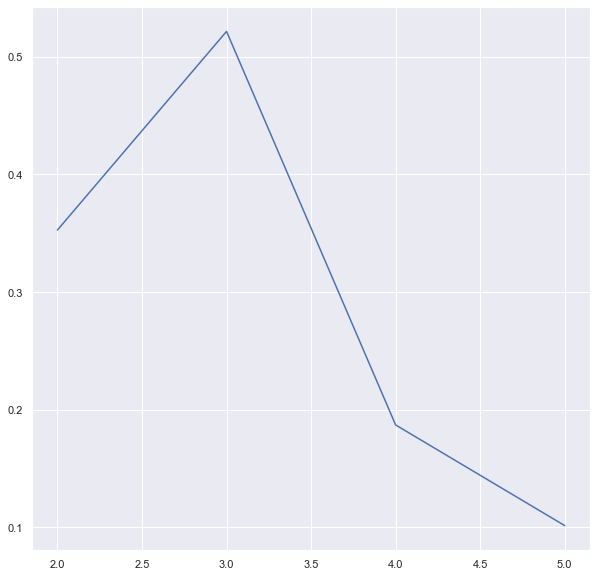

In [147]:
find_best_GMM(X,range_n_clusters)

In [70]:
final_features

['Age',
 'Education',
 'AvgVisitDuration',
 'PrescriptionAttitude',
 'PublicationsNumber',
 'CongressesAttended',
 'PartnershipsPhC',
 'CollabAttitudePhC',
 'AvgOpenedEmail',
 'VisitsLandingPageLY',
 'AccessOnlineServiceLY',
 'AttendedEventsLY',
 'ClickthroughRate',
 'OpenRate',
 'Gender_F',
 'Gender_M',
 'RoleClinical',
 'RoleResponsability']

Now that we have understood the importance of scaling and how to use the silhouette score, 
we can turn on all the available features and perform the clustering analysis again

For n_clusters = 2 The average silhouette_score is : 0.3023496584294616
For n_clusters = 3 The average silhouette_score is : 0.23119078727724315
For n_clusters = 4 The average silhouette_score is : 0.2562589304179318


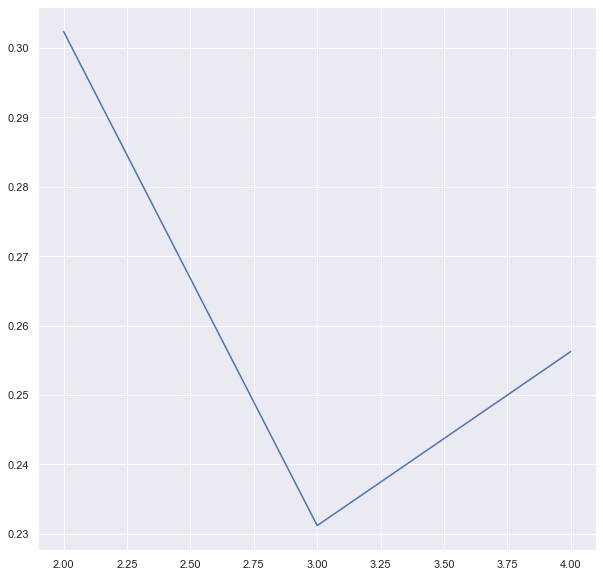

In [152]:
X = data_scaled[final_features]
find_best_kMeans(X,range_n_clusters=[2,3,4])



In [153]:
model = KMeans(n_clusters = 2)
X = data_scaled[final_features]
result = X.copy()
result['Cluster'] = model.fit_predict(X)



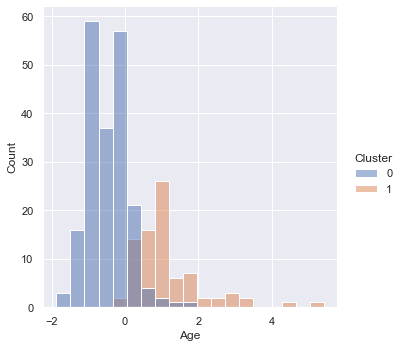

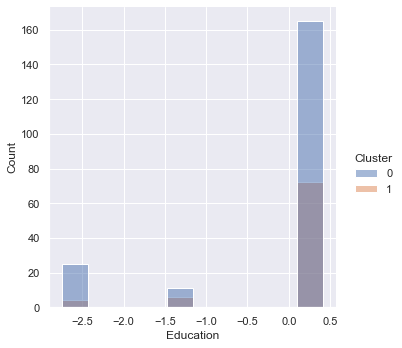

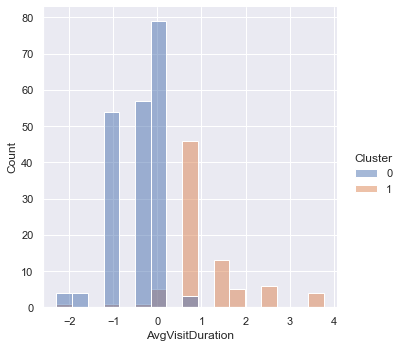

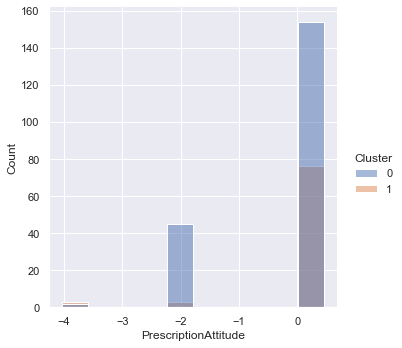

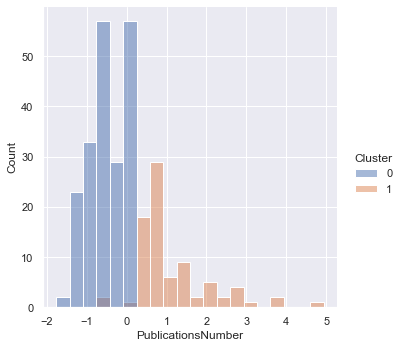

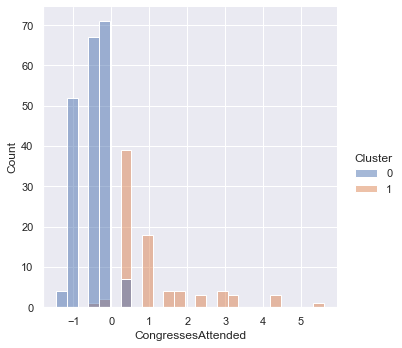

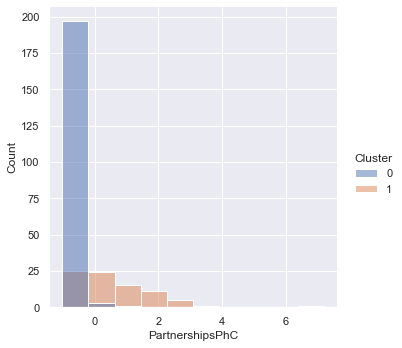

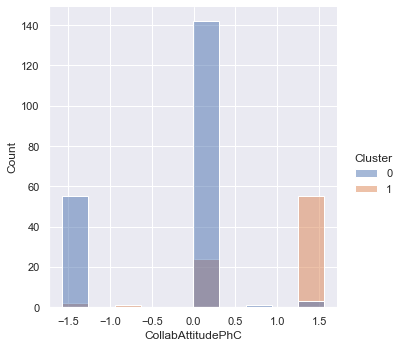

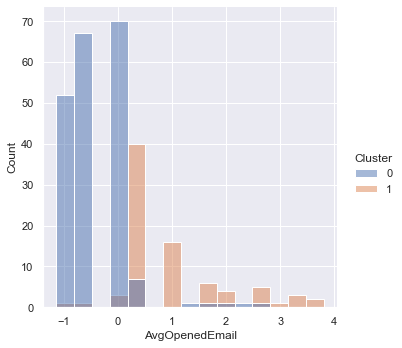

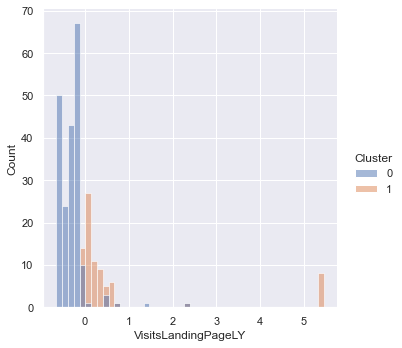

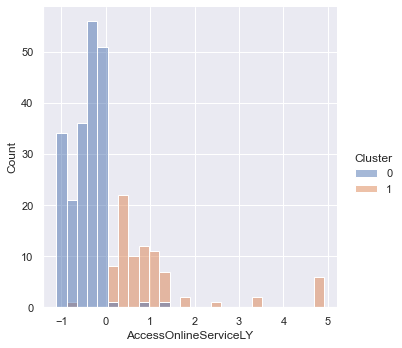

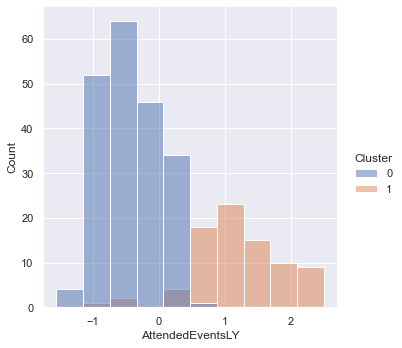

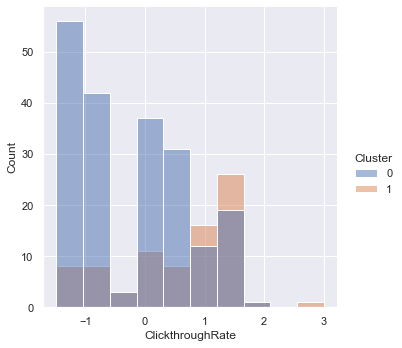

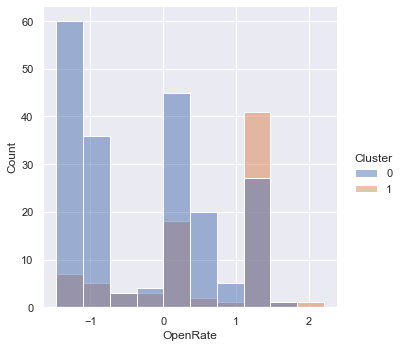

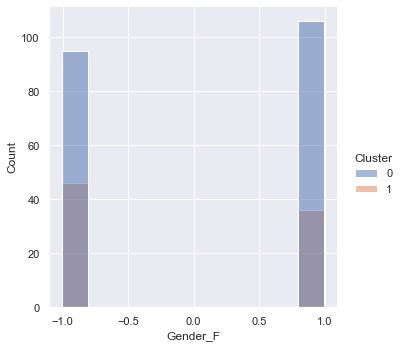

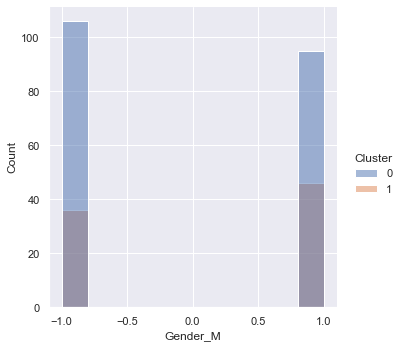

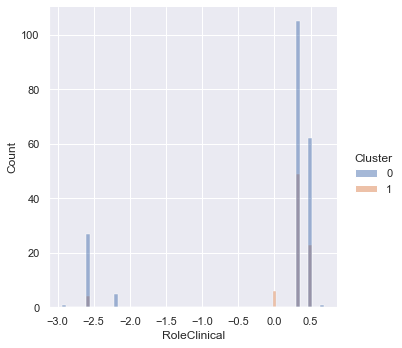

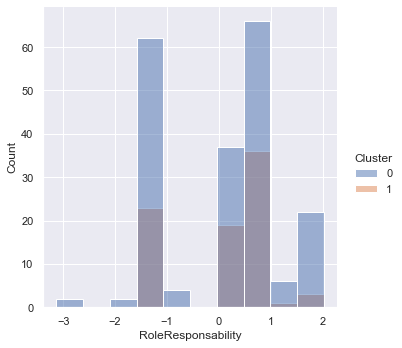

In [154]:
for f in final_features[:]:
    sns.displot(data=result,x=f,hue='Cluster')

Let's look how the unused feature EngagementDriver is splitted across the clusters, 
to find out if the two cluster have indeed some differences 

In [90]:
result['EngagementDriver'] = data.EngagementDriver # add the Feature to the results

In [91]:
result.query('Cluster==0').EngagementDriver.value_counts()[:3]

Email Subject Line    16
Personalization       15
Content Relevance     15
Name: EngagementDriver, dtype: int64

In [92]:
result.query('Cluster==1').EngagementDriver.value_counts()[:3]

Content Relevance    43
Content Format       40
Personalization      31
Name: EngagementDriver, dtype: int64